In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

sns.set(palette='Set2')

In [2]:
data = pd.read_csv('/Users/veronika/customers-propensity/Data/unknown_behaviors.csv')
optimization_results = pd.read_csv('/Users/veronika/customers-propensity/Data/selected_clients.csv')
selected_ids = optimization_results['client_id']

selected_clients = data[data['customer_id'].isin(selected_ids)]
all_clients = data

In [3]:
metrics = {
    'Кол-во клиентов': len(selected_clients),
    'Средний возраст': selected_clients['age'].mean(),
    'Средний доход': selected_clients['income'].mean(),
    # 'Доля с просрочками': selected_clients['bad_payment'].mean() * 100,
    'Доля с зол. картой': selected_clients['gold_card'].mean() * 100,
    'Ср. кол-во продуктов': selected_clients['number_products'].mean(),
    'Ср. RFM-скоро': selected_clients['rfm_score'].mean()
}

comparison = {}
for col in ['age', 'income', 'number_products', 'rfm_score']:
    diff = (selected_clients[col].mean() - all_clients[col].mean()) / all_clients[col].mean() * 100
    comparison[f'{col}_diff'] = f"{diff:.1f}%"

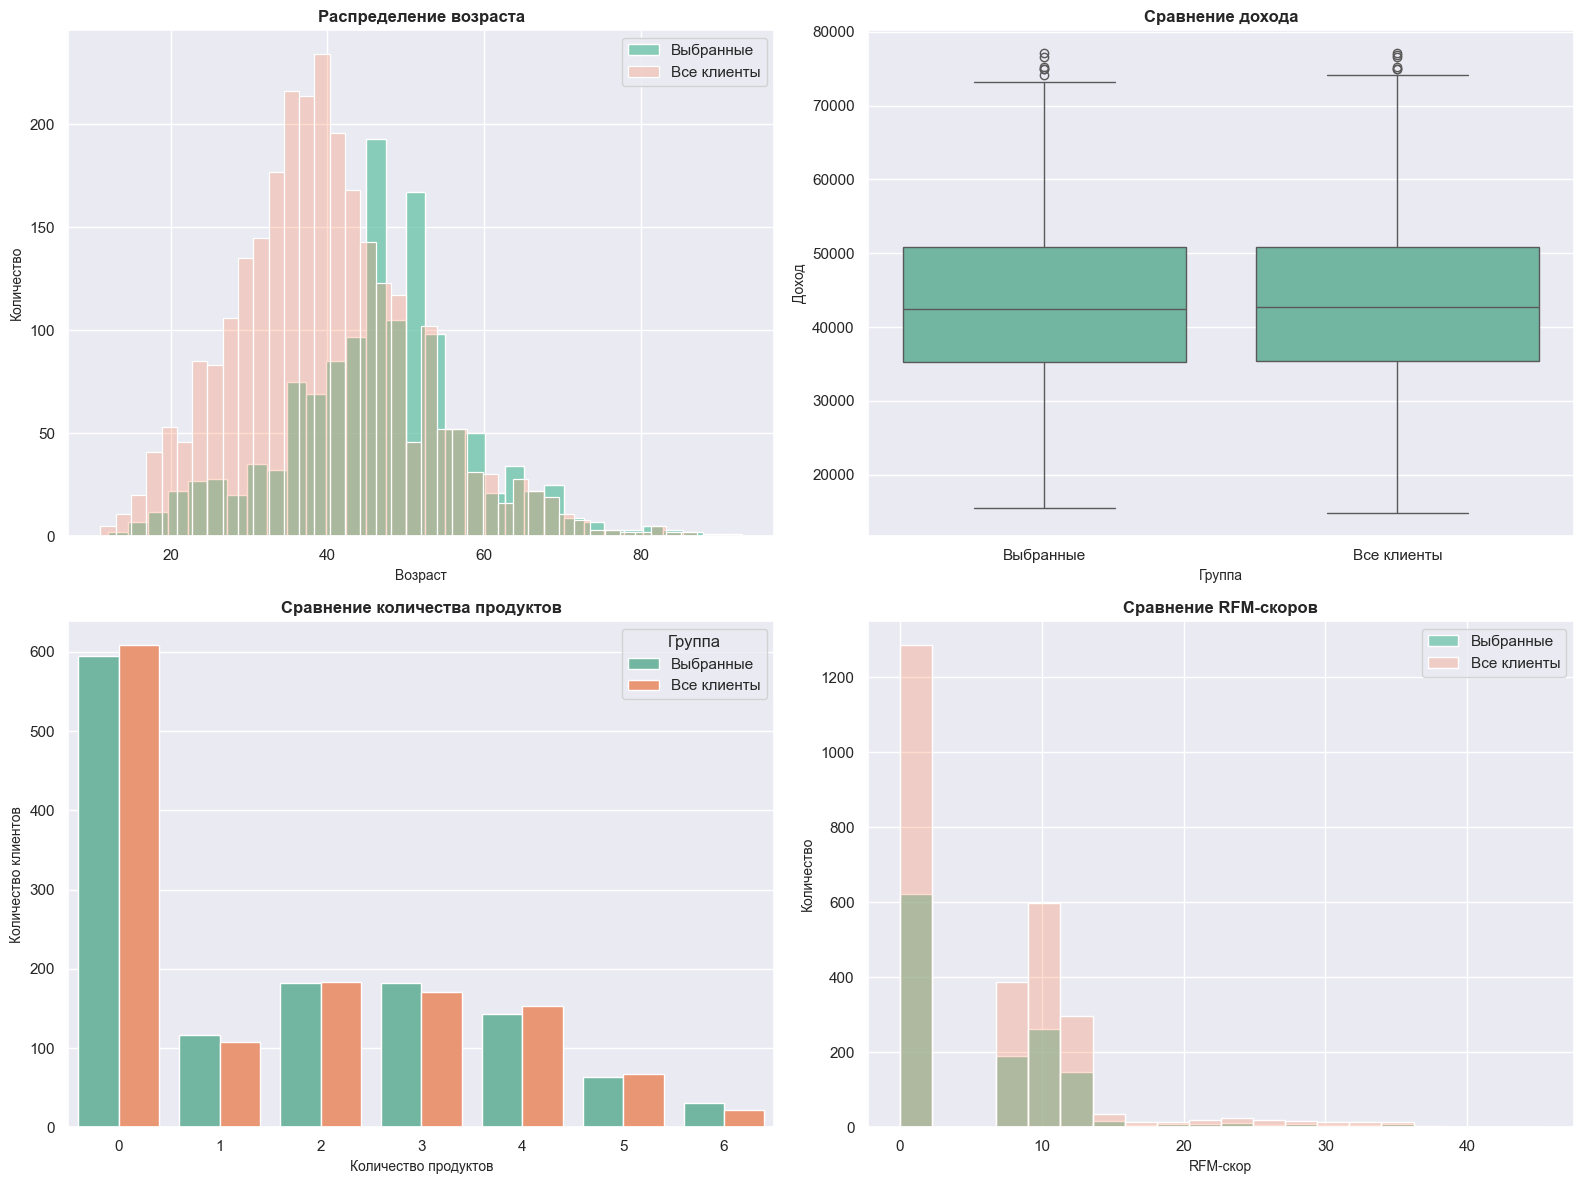

In [15]:
# Графики 2x2
plt.figure(figsize=(16, 12))

# Распределение возраста
plt.subplot(2, 2, 1)
sns.histplot(data=selected_clients, x='age', label='Выбранные')
sns.histplot(data=all_clients, x='age', alpha=0.3, label='Все клиенты')
plt.title('Распределение возраста', fontsize=12, fontweight='bold')
plt.legend()
plt.xlabel('Возраст', fontsize=10)
plt.ylabel('Количество', fontsize=10)

# Распределение дохода
plt.subplot(2, 2, 2)
sns.boxplot(data=pd.concat([
    selected_clients.assign(group='Выбранные'),
    all_clients.sample(len(selected_clients)).assign(group='Все клиенты')
]), x='group', y='income')
plt.title('Сравнение дохода', fontsize=12, fontweight='bold')
plt.xlabel('Группа', fontsize=10)
plt.ylabel('Доход', fontsize=10)

# Количество продуктов
plt.subplot(2, 2, 3)
sns.countplot(data=pd.concat([
    selected_clients.assign(group='Выбранные'),
    all_clients.sample(len(selected_clients)).assign(group='Все клиенты')
]), x='number_products', hue='group')
plt.title('Сравнение количества продуктов', fontsize=12, fontweight='bold')
plt.xlabel('Количество продуктов', fontsize=10)
plt.ylabel('Количество клиентов', fontsize=10)
plt.legend(title='Группа')

# 4. RFM-скоры (сравнение)
plt.subplot(2, 2, 4)
sns.histplot(data=selected_clients, x='rfm_score', label='Выбранные', bins=20, alpha=0.7)
sns.histplot(data=all_clients, x='rfm_score', label='Все клиенты', bins=20, alpha=0.3)
plt.title('Сравнение RFM-скоров', fontsize=12, fontweight='bold')
plt.xlabel('RFM-скор', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

Видим разницу в распределении возраста. В остальном разницы нет особо (на последнем графике только из-за количества разница)

In [7]:
print("\nОсновные метрики:")
display(pd.DataFrame([metrics]))

print("\nСравнение с общей базой (% разницы):")
display(pd.DataFrame([comparison]))


Основные метрики:


,Кол-во клиентов,Средний возраст,Средний доход,Доля с просрочками,Доля с зол. картой,Ср. кол-во продуктов,Ср. RFM-скоро
0,1312,46.460366,42898.509146,0.152439,4.420732,1.599848,6.311518



Сравнение с общей базой (% разницы):


,age_diff,income_diff,number_products_diff,rfm_score_diff
0,17.4%,0.4%,-1.3%,0.2%


In [8]:
mean_income_all = all_clients['income'].mean()
mean_income_selected = selected_clients['income'].mean()
difference = mean_income_selected - mean_income_all
difference_percent = (difference / mean_income_all) * 100

income_comparison = pd.DataFrame({
    'Группа': ['Все клиенты', 'Выбранные клиенты'],
    'Средний доход': [mean_income_all, mean_income_selected],
    'Разница (абс)': [0, difference],
    'Разница (%)': [0, difference_percent]
})

print("Сравнение среднего дохода:")
display(income_comparison)

Сравнение среднего дохода:


,Группа,Средний доход,Разница (абс),Разница (%)
0,Все клиенты,42708.566763,0.000000,0.000000
1,Выбранные клиенты,42898.509146,189.942383,0.444741


In [13]:
mean_age_all = all_clients['age'].mean()
mean_age_selected = selected_clients['age'].mean()
difference = mean_age_selected - mean_age_all
difference_percent = (difference / mean_income_all) * 100

income_comparison = pd.DataFrame({
    'Группа': ['Все клиенты', 'Выбранные клиенты'],
    'Средний возраст': [mean_age_all, mean_age_selected],
    'Разница (абс)': [0, difference],
    'Разница (%)': [0, difference_percent]
})

print("Сравнение среднего возраста:")
display(income_comparison)

Сравнение среднего возраста:


,Группа,Средний возраст,Разница (абс),Разница (%)
0,Все клиенты,39.563498,0.000000,0.000000
1,Выбранные клиенты,46.460366,6.896868,0.016149


Средний возраст выбранных для рассылки клиентов больше, чем общий средний возраст

Доход тоже больше но незначительно (или стоит подправить еще выбор, потому что странно)